In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('intro_extro.csv')
df

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert
...,...,...,...,...,...,...,...,...,...
18519,18519,3.0,No,7.0,3.0,No,9.0,7.0,Extrovert
18520,18520,1.0,NaN,6.0,7.0,No,6.0,5.0,Extrovert
18521,18521,7.0,Yes,1.0,1.0,Yes,1.0,NaN,Introvert
18522,18522,NaN,Yes,1.0,0.0,Yes,5.0,2.0,Introvert


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [3]:
df['Personality'].value_counts()

Personality
Extrovert    13699
Introvert     4825
Name: count, dtype: int64

In [4]:
df.describe()

,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,18524.000000,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,9261.500000,3.137764,5.265106,4.044319,7.996737,4.982097
std,5347.562529,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4630.750000,1.000000,3.000000,3.000000,5.000000,3.000000
50%,9261.500000,2.000000,5.000000,4.000000,8.000000,5.000000
75%,13892.250000,4.000000,8.000000,6.000000,12.000000,7.000000
max,18523.000000,11.000000,10.000000,7.000000,15.000000,10.000000


<Axes: >

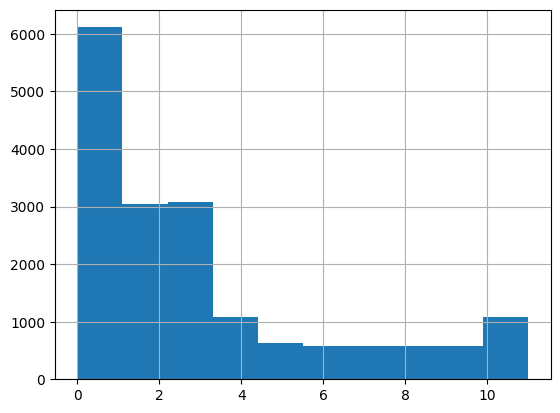

In [6]:
df['Time_spent_Alone'].hist()

In [27]:
df['Time_spent_Alone'] = df['Time_spent_Alone'].fillna(df['Time_spent_Alone'].median())
df['Social_event_attendance'] = df['Social_event_attendance'].fillna(df['Social_event_attendance'].median())
df['Friends_circle_size'] = df['Friends_circle_size'].fillna(df['Friends_circle_size'].median())
df['Going_outside'] = df['Going_outside'].fillna(df['Going_outside'].mode()[0])
df['Drained_after_socializing'] = df['Drained_after_socializing'].fillna(df['Drained_after_socializing'].mode()[0])
df['Stage_fear'] = df['Stage_fear'].fillna(df['Stage_fear'].mode()[0])

<Axes: >

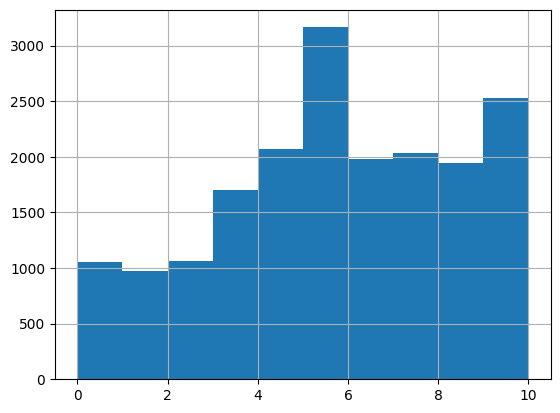

In [28]:
df['Social_event_attendance'].hist()

<Axes: >

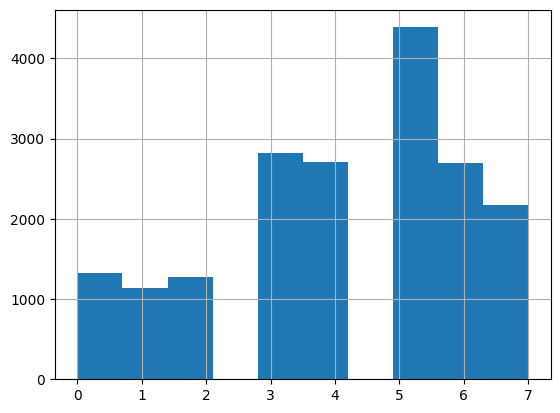

In [29]:
df['Going_outside'].hist()

<Axes: >

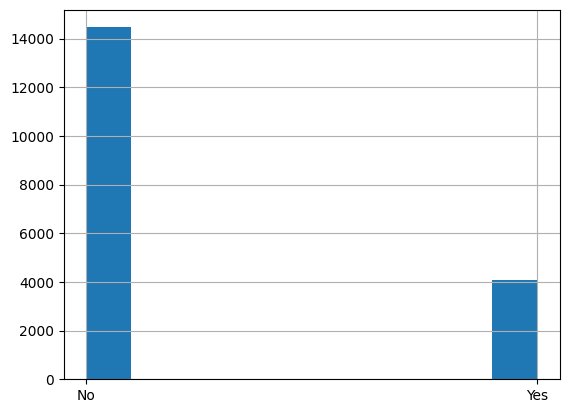

In [30]:
df['Drained_after_socializing'].hist()

<Axes: >

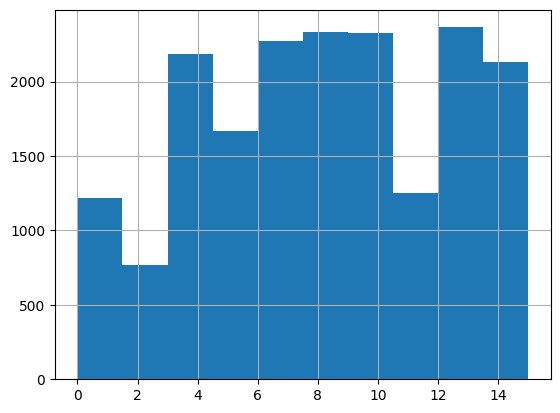

In [31]:
df['Friends_circle_size'].hist()

<Axes: >

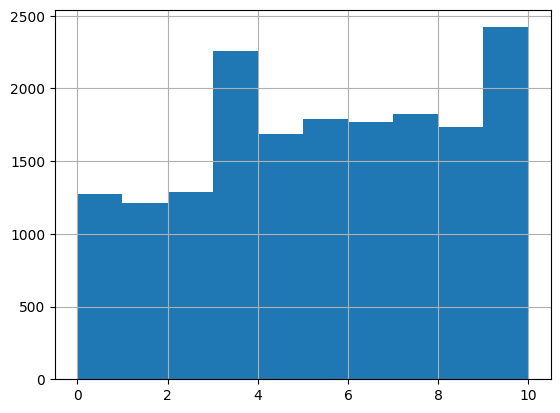

In [32]:
df['Post_frequency'].hist()

In [33]:
df['Post_frequency'].describe()

count    17260.000000
mean         4.982097
std          2.879139
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Post_frequency, dtype: float64

In [34]:
df['Post_frequency'] = df['Post_frequency'].fillna(df['Post_frequency'].median())

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           18524 non-null  float64
 2   Stage_fear                 18524 non-null  object 
 3   Social_event_attendance    18524 non-null  float64
 4   Going_outside              18524 non-null  float64
 5   Drained_after_socializing  18524 non-null  object 
 6   Friends_circle_size        18524 non-null  float64
 7   Post_frequency             18524 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [36]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

X = df.drop(['Personality', 'id'], axis=1)
y = df['Personality']

cat_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

cat_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.03,
    depth=6,
    eval_metric='Logloss',
    random_seed=42,
    verbose=100
)

cat_model.fit(X_train, y_train, cat_features=cat_features)

y_pred = cat_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

0:	learn: 0.6461293	total: 163ms	remaining: 2m 42s
100:	learn: 0.1281228	total: 579ms	remaining: 5.15s
200:	learn: 0.1230075	total: 981ms	remaining: 3.9s
300:	learn: 0.1191419	total: 1.37s	remaining: 3.18s
400:	learn: 0.1146652	total: 1.76s	remaining: 2.63s
500:	learn: 0.1109869	total: 2.15s	remaining: 2.14s
600:	learn: 0.1075105	total: 2.52s	remaining: 1.67s
700:	learn: 0.1046211	total: 2.88s	remaining: 1.23s
800:	learn: 0.1017349	total: 3.42s	remaining: 851ms
900:	learn: 0.0992431	total: 4.56s	remaining: 501ms
999:	learn: 0.0970651	total: 5.89s	remaining: 0us
Confusion Matrix:
 [[2682   58]
 [  49  916]]

Classification Report:
               precision    recall  f1-score   support

   Extrovert       0.98      0.98      0.98      2740
   Introvert       0.94      0.95      0.94       965

    accuracy                           0.97      3705
   macro avg       0.96      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705


Accuracy Score: 0.971120107962213

In [37]:
df['Stage_fear'] = df['Stage_fear'].map({'No': 0, 'Yes': 1})
df['Drained_after_socializing'] = df['Drained_after_socializing'].map({'No': 0, 'Yes': 1})
df['Personality'] = df['Personality'].map({'Introvert': 0, 'Extrovert': 1})

In [38]:
df

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,0,6.0,4.0,0,15.0,5.0,1
1,1,1.0,0,7.0,3.0,0,10.0,8.0,1
2,2,6.0,1,1.0,0.0,0,3.0,0.0,0
3,3,3.0,0,7.0,3.0,0,11.0,5.0,1
4,4,1.0,0,4.0,4.0,0,13.0,5.0,1
...,...,...,...,...,...,...,...,...,...
18519,18519,3.0,0,7.0,3.0,0,9.0,7.0,1
18520,18520,1.0,0,6.0,7.0,0,6.0,5.0,1
18521,18521,7.0,1,1.0,1.0,1,1.0,5.0,0
18522,18522,2.0,1,1.0,0.0,1,5.0,2.0,0


In [39]:
X = df.drop(['Personality', 'id'], axis=1)
y = df['Personality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12966, 7), (5558, 7), (12966,), (5558,))

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled, X_test_scaled

(array([[-0.70832192, -0.5280382 ,  1.41323103, ..., -0.53138097,
         -0.97881324,  0.73331334],
        [-1.04986532, -0.5280382 ,  1.78722743, ..., -0.53138097,
          0.23974581,  1.45474744],
        [-0.02523512, -0.5280382 ,  1.03923463, ..., -0.53138097,
          1.21459304, -0.34883781],
        ...,
        [-0.02523512, -0.5280382 ,  0.66523823, ..., -0.53138097,
          1.45830485,  1.09403039],
        [-0.02523512, -0.5280382 , -0.45675096, ..., -0.53138097,
          0.23974581,  1.45474744],
        [-1.04986532, -0.5280382 , -0.83074736, ..., -0.53138097,
          1.45830485,  0.37259629]], shape=(12966, 7)),
 array([[-0.36677852, -0.5280382 ,  1.41323103, ..., -0.53138097,
         -0.003966  ,  0.01187924],
        [-1.04986532, -0.5280382 ,  1.41323103, ..., -0.53138097,
         -0.49138962, -0.34883781],
        [-0.02523512, -0.5280382 ,  1.03923463, ..., -0.53138097,
          0.48345761,  1.81546449],
        ...,
        [-0.02523512, -0.5280382 ,  

In [45]:
import lightgbm as lgb

lgbm_model = lgb.LGBMClassifier(
    boosting_type='gbdt',
    objective='binary',
    num_leaves=35,
    max_depth=12,
    learning_rate=0.01,
    n_estimators=1000,
    subsample=0.8,
    colsample_bytree=0.8,
    verbose=-1,
    scale_pos_weight= 1.33,
    reg_lambda=1.0,
    random_state=42
)
lgbm_model.fit(X_train_scaled, y_train)

y_pred = lgbm_model.predict(X_test_scaled)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[1340  103]
 [  78 4037]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      1443
           1       0.98      0.98      0.98      4115

    accuracy                           0.97      5558
   macro avg       0.96      0.95      0.96      5558
weighted avg       0.97      0.97      0.97      5558


Accuracy Score: 0.967434328895286


c:\Users\flash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42, min_samples_leaf=3, min_samples_split=2)
rf_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=3, random_state=42)

In [44]:
y_pred = rf_model.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1443
           1       0.98      0.98      0.98      4115

    accuracy                           0.97      5558
   macro avg       0.96      0.95      0.96      5558
weighted avg       0.97      0.97      0.97      5558



In [42]:
import joblib
joblib.dump(lgbm_model, 'lgbm_model.pkl')

['lgbm_model.pkl']